In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import gwsurrogate

/Users/spx8sk/anaconda3/envs/wispy-dev/lib/python3.7/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/Users/spx8sk/anaconda3/envs/wispy-dev/lib/python3.7/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [2]:
matplotlib.rcParams.update({'font.size': 16})

In [3]:
sur = gwsurrogate.LoadSurrogate('/Users/spx8sk/work/data/NRHybSur3dq8.h5')

/Users/spx8sk/anaconda3/envs/wispy-dev/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Loaded NRHybSur3dq8 model


In [4]:
q = 1
chiA = [0, 0, 0.]
chiB = [0, 0, 0.]
dt = 0.1        # step size, Units of M
f_low = 5e-3    # initial frequency, Units of cycles/M
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low)        # dyn stands for dynamics and is always None for this model

(-30, 100)

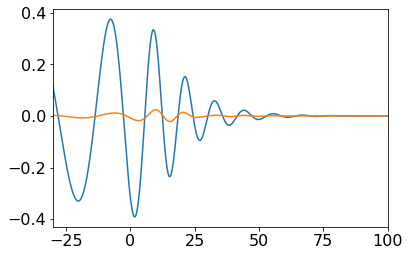

In [5]:
plt.figure()
plt.plot(t, h[(2,2)].real)
plt.plot(t, h[(3,2)].real)
plt.xlim(-30,100)

# loop over 2,2 mode

In [67]:
q_list = np.arange(1, 4, 0.5)

In [41]:
f_low

0.005

In [52]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [68]:
hs={}
for q in q_list:
    chiA = [0, 0, 0.]
    chiB = [0, 0, 0.]
    dt = 0.1        # step size, Units of M
    f_low = 5e-3    # initial frequency, Units of cycles/M
    t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low*3)        # dyn stands for dynamics and is always None for this model
    
    phase = np.unwrap(np.angle(h[(3,2)]))
    freq = IUS(t, phase).derivative()(t)
    
    
    hs.update({q:{'t':t,'h':h, 'f':freq}})

    

In [69]:
hs.keys()

dict_keys([1.0, 1.5, 2.0, 2.5, 3.0, 3.5])

(-10, 40)

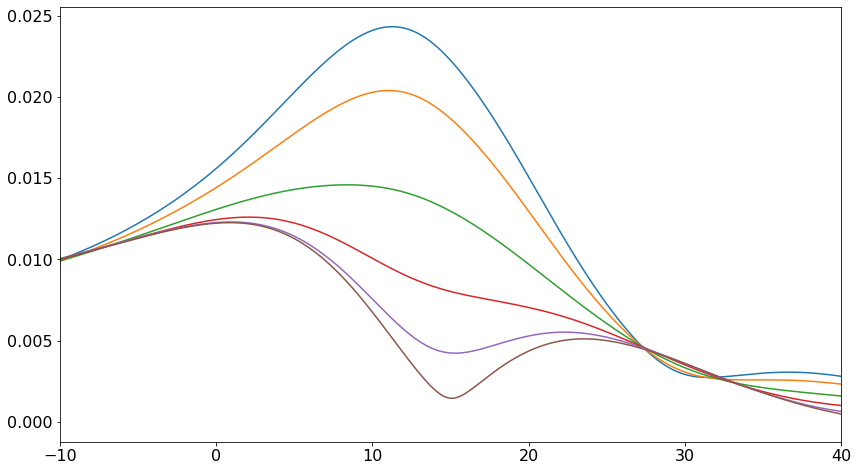

In [70]:
plt.figure(figsize=(14,8))
for k in hs.keys():
    plt.plot(hs[k]['t'], np.abs(hs[k]['h'][(3,2)]), label=str("{:.2f}".format(k)))
plt.xlim(-10,40)
# plt.yscale('log')
# plt.legend()

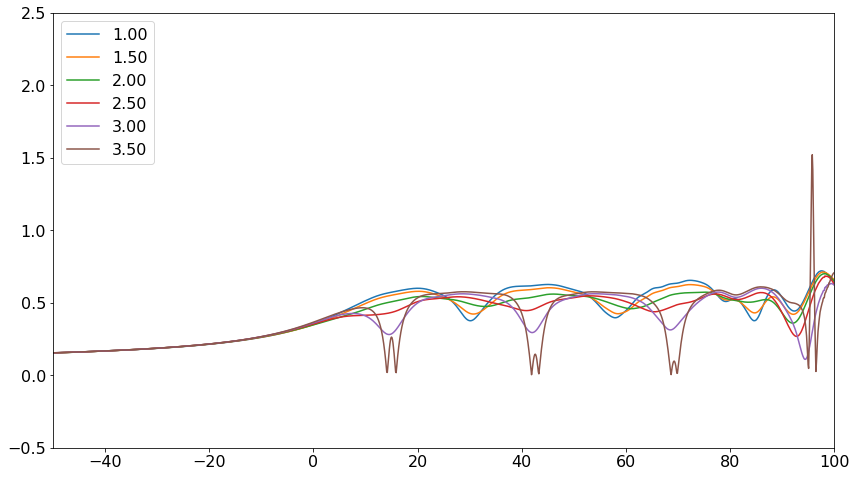

In [71]:
plt.figure(figsize=(14,8))
for k in hs.keys():
    plt.plot(hs[k]['t'], np.abs(hs[k]['f']), label=str("{:.2f}".format(k)))
plt.xlim(-50,100)
plt.ylim(-0.5,2.5)
# plt.yscale('log')
plt.legend(loc='upper left')